# Régression linéaire à une variable - Exercices tirés du MOOC d'Andrew Ng

## Chargement des données

### Charger les données du fichier ex1data1.csv

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv("ex1data1.csv")

### Visualiser les données

    population    profit
0       6.1101  17.59200
1       5.5277   9.13020
2       8.5186  13.66200
3       7.0032  11.85400
4       5.8598   6.82330
5       8.3829  11.88600
6       7.4764   4.34830
7       8.5781  12.00000
8       6.4862   6.59870
9       5.0546   3.81660
10      5.7107   3.25220
11     14.1640  15.50500
12      5.7340   3.15510
13      8.4084   7.22580
14      5.6407   0.71618
15      5.3794   3.51290
16      6.3654   5.30480
17      5.1301   0.56077
18      6.4296   3.65180
19      7.0708   5.38930
20      6.1891   3.13860
21     20.2700  21.76700
22      5.4901   4.26300
23      6.3261   5.18750
24      5.5649   3.08250
25     18.9450  22.63800
26     12.8280  13.50100
27     10.9570   7.04670
28     13.1760  14.69200
29     22.2030  24.14700
..         ...       ...
67     10.2360   7.77540
68      5.4994   1.01730
69     20.3410  20.99200
70     10.1360   6.67990
71      7.3345   4.02590
72      6.0062   1.27840
73      7.2259   3.34110
74      5.0269  -2.68070


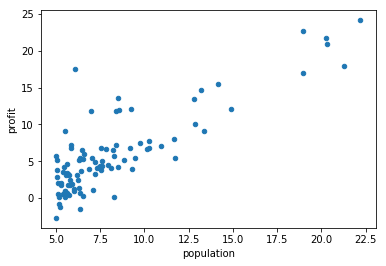

In [6]:
df = pd.DataFrame(data)
print(df)
data.plot.scatter('population', 'profit')

Découpez vos données en deux vecteurs X et y et transformerz-les en array numpy

Note: Les colonnes d'un Dataframe peuvent être sélectionnées par leur nom, de la même manière que dans un dictionnaire

In [8]:
X = np.array(data['population'])
y = np.array(data['profit'])

## Calcul d'une première prédiction

### Initialisez theta en un vecteur de deux valeurs à zéro

In [7]:
theta = np.zeros(2)

### Écrivez une fonction _predict_ qui prend en argument une population (x) ainsi que les parametres theta et prédit le profit (y) associé

In [9]:
#Trouver comment utiliser la methode de la matrice

def predict(X, theta):
    return (X * theta[1] + theta[0])

### Écrivez une fonction _fit_ qui prend en arguments le vecteur X et le vecteur y des données d'entraînement et renvoie le vecteur de paramètres _theta_ qui a été appris

In [14]:
def fit(X, y, theta, alpha, num_iters):
    # Initialiser certaines variable utiles
    m = len(X)
    
    # Boucler sur le nombre d'itérations
    for i in range(num_iters):
        
        # Effectuer une itération de descente du gradient (i.e. on update theta une fois)
        tmp = theta[0] - (alpha / m) * np.sum(predict(X, theta) - y)
        theta[1] = theta[1] - (alpha / m) * np.dot(X, predict(X, theta) - y)
        theta[0] = tmp

    return theta

### Lancez l'apprentissage en appelant la fonction _fit_ et en prenant bien soin de récupérer le résultat de *theta* à la fin!! Vous devriez obtenir des valeurs autour de [-3.6303, 1.1664]

Pour commencer, on fixera alpha à 0.01 et num_iters à 1500

In [16]:
fit_theta = fit(X, y, theta, 0.01, 1500)
print(fit_theta)

[-3.8957756   1.19303311]


## Visualiser la droite de régression

### Voici une fonction pour visualiser votre droite de régression (cadeau!) Vous pourrez l'appeler plus loin dans l'exercice

In [92]:
def visualize(theta):
    fig = plt.figure()
    ax = plt.axes()
    ax.set_xlim([4.5,22.5])
    ax.set_ylim([-5, 25])
    ax.scatter(X, y)
    line_x = np.linspace(0,22.5, 20)
    line_y = theta[0] + line_x * theta[1]
    ax.plot(line_x, line_y)
    plt.show()

### Appelez la fonction pour visualiser la droite avec différentes valeurs de theta

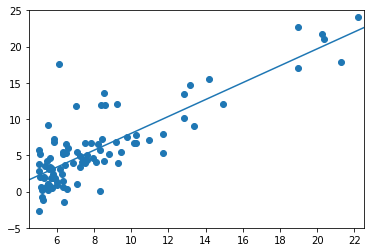

In [93]:
visualize(theta)

## Fonction de coût

Maintenant voyons comment resserrer notre analyse de l'algorithme et calculons le coût (ou la perte, ou l'erreur) à chaque itération.

### Définissez la fonction de coût de votre modèle

In [21]:
def cost(X, y, theta):
    m = len(X)
    tmp = np.subtract(predict(X, theta), y)
    return (1 / (2 * m)) * np.dot(tmp, tmp)

### Testez-la avec theta = [0,0]   Vous devriez obtenir environ 32.07

In [98]:
theta = [0, 0]
c = cost(X, y, theta)
c

32.072733877455676

### Maintenant avec theta = [-1,2]. Vous devriez obtenir environ 54.24

In [99]:
theta = [-1, 2]
c = cost(X, y, theta)
c

54.24245508201238

### Copiez le code de votre fonction _fit_ et ajoutez-y un appel à la fonction _cost_, à chaque itération. Vous stockerez vos résultats dans une liste nommée J_history, que vous retournerez avec *theta* à la fin de la fonction

Et oui, en Python, une fonction peut retourner plus qu'une variable!!

In [22]:
def fit_with_cost(X, y, theta, alpha, num_iters):
    m = len(X)
    J_history = [cost(X, y, theta)]
    for i in range(num_iters):
        tmp = theta[0] - (alpha / m) * np.sum(np.subtract(predict(X, theta), y))
        theta[1] = theta[1] - (alpha / m) * np.dot(X, np.subtract(predict(X, theta), y))
        theta[0] = tmp
        J_history.append(cost(X, y, theta))

    return theta, J_history

### Appelez la fonction en récupérant les valeurs de theta et J_history

In [19]:
# D'abord on réinitialise theta à zéro
theta = np.zeros(2)

In [23]:
# Lancez l'entraînement avec votre nouvelle fonction
fit_theta, J_history = fit_with_cost(X, y, theta, 0.01, 1500)
print(fit_theta)
print(J_history)

[-3.63029144  1.16636235]
[32.072733877455676, 6.737190464870008, 5.931593568604956, 5.901154707081388, 5.895228586444221, 5.89009494311733, 5.885004158443646, 5.8799324804914175, 5.874879094762573, 5.869843911806385, 5.86482686531293, 5.8598278899321805, 5.85484692057229, 5.849883892376587, 5.844938740722034, 5.840011401218361, 5.8351018097072265, 5.830209902261388, 5.825335615183862, 5.820478885007099, 5.815639648492154, 5.81081784262787, 5.806013404630045, 5.80122627194063, 5.796456382226898, 5.791703673380653, 5.7869680835173956, 5.782249550975539, 5.777548014315596, 5.772863412319382, 5.768195683989212, 5.76354476854712, 5.758910605434047, 5.754293134309078, 5.749692295048628, 5.745108027745684, 5.740540272709014, 5.735988970462381, 5.731454061743792, 5.726935487504702, 5.722433188909257, 5.717947107333529, 5.713477184364749, 5.709023361800549, 5.704585581648198, 5.700163786123856, 5.695757917651815, 5.691367918863752, 5.68699373259798, 5.682635301898707, 5.678292570015292, 5.6739

### On visualise maintenant l'évolution du coût en fonction du nombre d'itérations

Vous pouvez voir si en modifiant les valeurs d'alpha et de num_iters, le graphique change d'allure

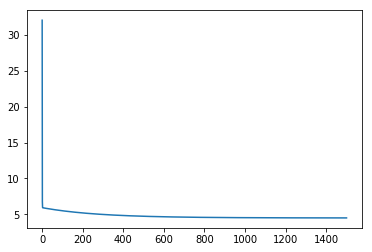

In [24]:
fit = plt.figure()
ax = plt.axes()
ax.plot(J_history)

# Exercices Numpy

 ## La suite d'exercices suivants a pour but de vous faire comprendre le fonctionnement des numpy array et leurs avantages/defaults par rapport aux listes de python.

### Creez une liste A nommée "list_A" contenant les éléments (0, 1, 1, 2, 3, 5, 8). A partir de cette liste créez un numpy array nommé "np_A"

In [26]:
list_A = [0, 1, 1, 2, 3, 5, 8]
np_A = np.array(list_A)

### Affichez votre numpy array. Ainsi que : sa forme, sa taille, sa dimension et son type

In [27]:
print(np_A)
print(np_A.shape)
print(len(np_A))
print(np_A.dtype)

[0 1 1 2 3 5 8]
(7,)
7
int64


### Ajoutez 2 a chaque element de la liste "list_A"

In [28]:
list_A = [i + 2 for i in list_A]
print (list_A)

[2, 3, 3, 4, 5, 7, 10]


### Ajoutez 2 a chaque élément de votre numpy array (votre solution ne doit pas utiliser de boucles)

In [29]:
np_A = np_A + 2
print (np_A)

[ 2  3  3  4  5  7 10]


### Calculez la somme de tous les éléments de "np_A" (sans utiliser de boucle)

In [19]:
sum = np_A.dot(np.full(np_A.shape, 1))
print (sum)

34


### Convertissez les elements de votre numpy array en float

In [23]:
np_A = np_A.astype(float)
print(np_A.dtype)

float64


### Convertissez votre numpy array en une liste python

In [30]:
list_np_A = np_A.tolist()
print (list_np_A)

[2, 3, 3, 4, 5, 7, 10]


### Exécutez les trois cellules suivantes pour visualiser les matrices M et N

In [26]:
M = np.random.randint(10, size=(4,4))
N = np.random.randint(10, size=(4,4))

In [27]:
M

array([[1, 2, 7, 5],
       [0, 0, 1, 8],
       [4, 1, 5, 3],
       [4, 8, 3, 1]])

In [28]:
N

array([[3, 1, 0, 4],
       [2, 9, 5, 5],
       [3, 4, 0, 7],
       [4, 2, 7, 3]])

### Aditionnez les deux matrices

In [30]:
print(M + N)

[[ 4  3  7  9]
 [ 2  9  6 13]
 [ 7  5  5 10]
 [ 8 10 10  4]]


### Calculez le produit matriciel de M et N. Vérifiez votre opération en calculant les premières cellules à la main

In [31]:
print(M.dot(N))

[[48 57 45 78]
 [35 20 56 31]
 [41 39 26 65]
 [41 90 47 80]]


### ** Bonus: Écrivez vous-mêmes une fonction de produit matriciel, avec des boucles imbriquées 

### ** Comparez son temps de calcul à la fonction de numpy avec de très grosses matrices en entrée

## Aller plus loin avec numpy (optionnal)

### Creez une liste a deux dimension ((1,2,3), (2,1,3), (3,2,1), (1,3,2)) nommée "list_B". Convertissez le en numpy array "np_B"

### Extrayez les deux premiere lignes et colonnes de "np_B". En sortie on obtient ((1,2),(2,1))

### Creez un masque qui montre toutes les valeurs egales a 1. 

### Pour toutes les valeurs du masque multipliez la valeur par 3

### Creez un nouveau numpy array "np_C" avec les valeurs (0, 0, 1, 2, 3, 5, 8) (en 1 dimension)

### Trouvez le minimum, maximum et la moyenne du numpy array "np_C"

### Creez une fonction qui prend un nombre en parametre et renvoie son carré. Appliquez cette fonction a chaque element de votre numpy array a l'aide de la fonction vectorize 

### Changez la dimension cd "np_B" pour qu'elle passe de 4 * 3 a 3 * 4

### Changez la dimension de np_B pour passer a un numpy array d'une seule dimension (flatten, ravel)

### Travail sur une image

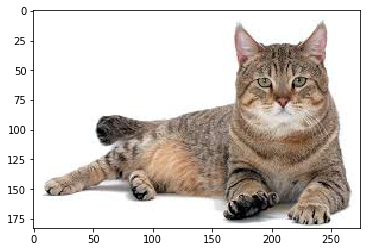

In [1]:
#install scikit-image
import numpy as np
from skimage import io
import matplotlib.pyplot as plt
%matplotlib inline
photo = io.imread("cat.jpeg")
plt.imshow(photo)

### A l'aide du slicing inversez l'orientation de l'image (le bas est en haut)

### A l'aide du slicing créez un mirroir de l'image d'origine

### A l'aide de np.where appliquez un masque qui converti les pixels en dessous de 100 en 0 et au dessus en 255

### Transposez l'image

Pour ceux souhaitant aller plus loin sur numpy quelques pistes intéressantes qui restent à explorer : les séquences, le sampling avec random choice, uniqs et count

## En résumé les numpy array ont les particularités suivantes :
- ils supportent des operations vectorizées (opérations sur chaque élements de la matrice)
- la taille d'un numpy array ne peux etre changé
- il n'y a qu'un type de donnée dans un numpy array
- ils prennent beaucoup moins de place 